#Analisis de modelos de regresion

##Importacion de librerias

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Carga de datos

In [34]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Ruta del archivo en tu Drive
url = '/content/drive/MyDrive/Duoc/6TO SEMESTRE/Machine learning/Resultados_modelos/regression_results.parquet'

try:
    # Cargar correctamente un archivo PARQUET
    regression = pd.read_parquet(url)
    print("✅ Datos cargados exitosamente!")
except Exception as e:
    print(f"❌ Error al cargar los datos: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Datos cargados exitosamente!


##Informacion general

In [35]:
print(f'Dimensiones iniciales: {regression.shape}')

Dimensiones iniciales: (5, 6)


In [36]:
print(f'Variables disponibles: {list(regression.columns)}')

Variables disponibles: ['Model', 'R2_Score', 'RMSE', 'MAE', 'CV_R2_Mean', 'CV_R2_Std']


In [37]:
display(regression)

,Model,R2_Score,RMSE,MAE,CV_R2_Mean,CV_R2_Std
4,gradient_boosting,0.570765,2.880628,1.663758,0.556311,0.026483
3,random_forest,0.568753,2.887372,1.651889,0.552244,0.026893
1,ridge,0.265203,3.768976,2.521563,0.272347,0.008127
0,linear_regression,0.265203,3.768978,2.521766,0.272347,0.008137
2,lasso,0.265168,3.769067,2.518639,0.272330,0.007981


##Analisis estadistico descriptivo

In [38]:
metricas_principales = ["RMSE", "MAE", "R2_Score", "MAE", "CV_R2_Mean"]

In [39]:
summary = regression.groupby("Model")[metricas_principales].agg(["mean", "std"]).round(4)

In [40]:
formatted_summary = pd.DataFrame()

# Detectar si las columnas son MultiIndex
is_multiindex = isinstance(summary.columns, pd.MultiIndex)

for metric in metricas_principales:
    if is_multiindex:
        # Buscar las columnas que contienen el metric y mean/std
        mean_candidates = [c for c in summary.columns if c[0] == metric and "mean" in c]
        std_candidates = [c for c in summary.columns if c[0] == metric and "std" in c]

        if mean_candidates and std_candidates:
            mean_col = mean_candidates[0]
            std_col = std_candidates[0]

            # Asegurar que obtenemos Series (una sola columna)
            formatted_summary[f"{metric} (mean ± std)"] = (
                summary[mean_col].iloc[:, 0] if isinstance(summary[mean_col], pd.DataFrame) else summary[mean_col]
            ).map("{:.4f}".format) + " ± " + (
                summary[std_col].iloc[:, 0] if isinstance(summary[std_col], pd.DataFrame) else summary[std_col]
            ).map("{:.4f}".format)
    else:
        # Caso columnas planas
        mean_col = f"{metric}_mean"
        std_col = f"{metric}_std"
        if mean_col in summary.columns and std_col in summary.columns:
            formatted_summary[f"{metric} (mean ± std)"] = (
                summary[mean_col].map("{:.4f}".format)
                + " ± "
                + summary[std_col].map("{:.4f}".format)
            )

formatted_summary.head()


/tmp/ipython-input-353418940.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  summary[mean_col].iloc[:, 0] if isinstance(summary[mean_col], pd.DataFrame) else summary[mean_col]
/tmp/ipython-input-353418940.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  summary[std_col].iloc[:, 0] if isinstance(summary[std_col], pd.DataFrame) else summary[std_col]
/tmp/ipython-input-353418940.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  summary[mean_col].iloc[:, 0] if isinstance(summary[mean_col], pd.DataFrame) else summary[mean_col]
/tmp/ipython-input-353418940.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  summary[std_col].iloc[:, 0] if isinstance(summary[std_col], pd.DataFrame) else summary[std_col]
/tmp/ipython-input-353418940.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  summary[mean_col].iloc[:, 0] if isinstance(summary[mean_col]

,RMSE (mean ± std),MAE (mean ± std),R2_Score (mean ± std),CV_R2_Mean (mean ± std)
Model,,,,
gradient_boosting,2.8806 ± nan,1.6638 ± nan,0.5708 ± nan,0.5563 ± nan
lasso,3.7691 ± nan,2.5186 ± nan,0.2652 ± nan,0.2723 ± nan
linear_regression,3.7690 ± nan,2.5218 ± nan,0.2652 ± nan,0.2723 ± nan
random_forest,2.8874 ± nan,1.6519 ± nan,0.5688 ± nan,0.5522 ± nan
ridge,3.7690 ± nan,2.5216 ± nan,0.2652 ± nan,0.2723 ± nan


###Resumen de rendimiento

In [41]:
display(formatted_summary)

,RMSE (mean ± std),MAE (mean ± std),R2_Score (mean ± std),CV_R2_Mean (mean ± std)
Model,,,,
gradient_boosting,2.8806 ± nan,1.6638 ± nan,0.5708 ± nan,0.5563 ± nan
lasso,3.7691 ± nan,2.5186 ± nan,0.2652 ± nan,0.2723 ± nan
linear_regression,3.7690 ± nan,2.5218 ± nan,0.2652 ± nan,0.2723 ± nan
random_forest,2.8874 ± nan,1.6519 ± nan,0.5688 ± nan,0.5522 ± nan
ridge,3.7690 ± nan,2.5216 ± nan,0.2652 ± nan,0.2723 ± nan


##Visualizacion comparativa

###Comparación de R² Score

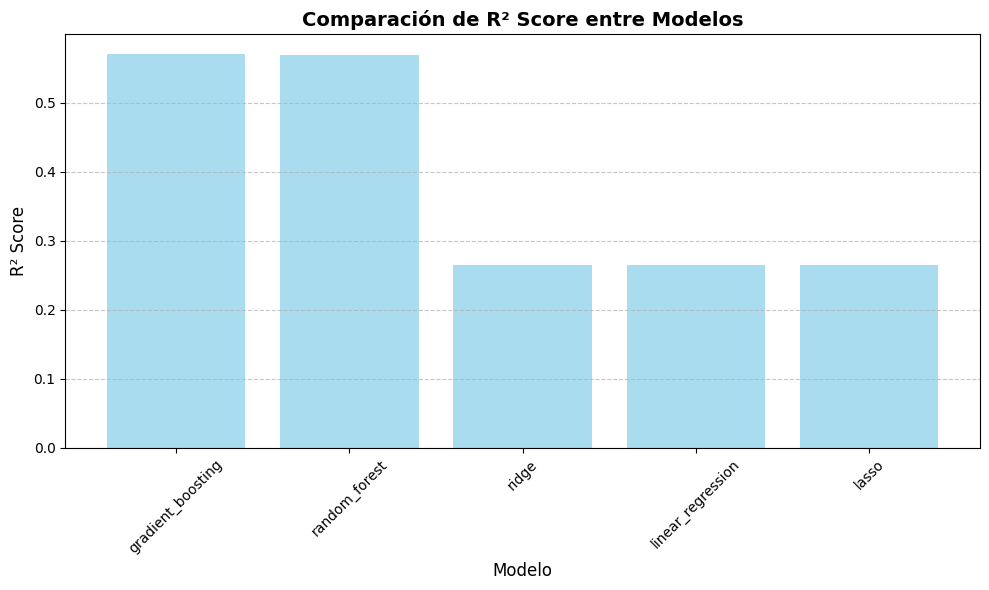

In [42]:
plt.figure(figsize=(10, 6))
r2_data = regression.groupby("Model")["R2_Score"].agg(['mean', 'std']).sort_values('mean', ascending=False)
plt.bar(r2_data.index, r2_data['mean'], yerr=r2_data['std'], capsize=5, alpha=0.7, color='skyblue')
plt.title("Comparación de R² Score entre Modelos", fontsize=14, fontweight='bold')
plt.ylabel("R² Score", fontsize=12)
plt.xlabel("Modelo", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###Comparación de RMSE

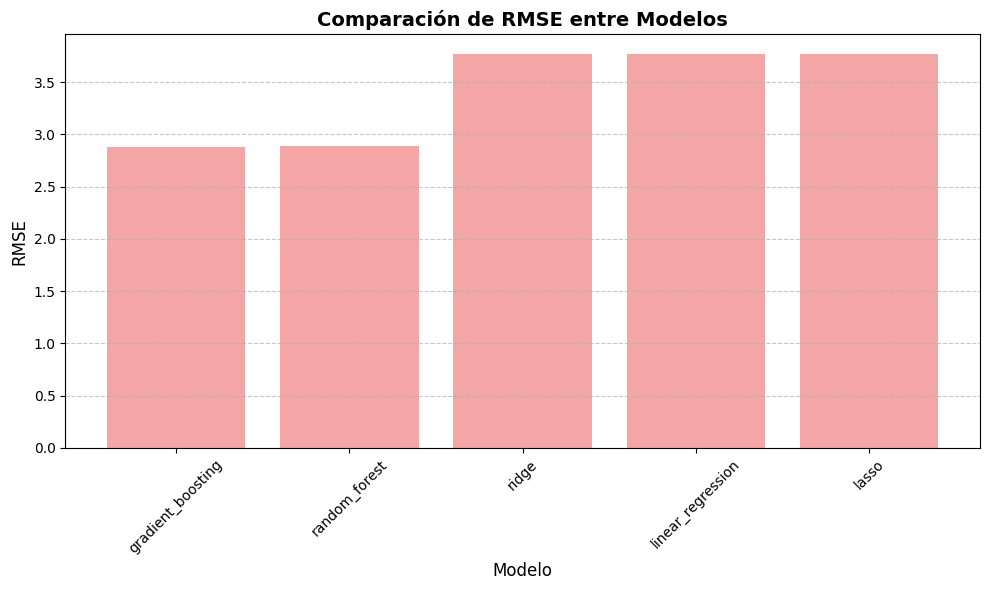

In [43]:
plt.figure(figsize=(10, 6))
rmse_data = regression.groupby("Model")["RMSE"].agg(['mean', 'std']).sort_values('mean', ascending=True)
plt.bar(rmse_data.index, rmse_data['mean'], yerr=rmse_data['std'], capsize=5, alpha=0.7, color='lightcoral')
plt.title("Comparación de RMSE entre Modelos", fontsize=14, fontweight='bold')
plt.ylabel("RMSE", fontsize=12)
plt.xlabel("Modelo", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###Heatmap de correlación entre métricas

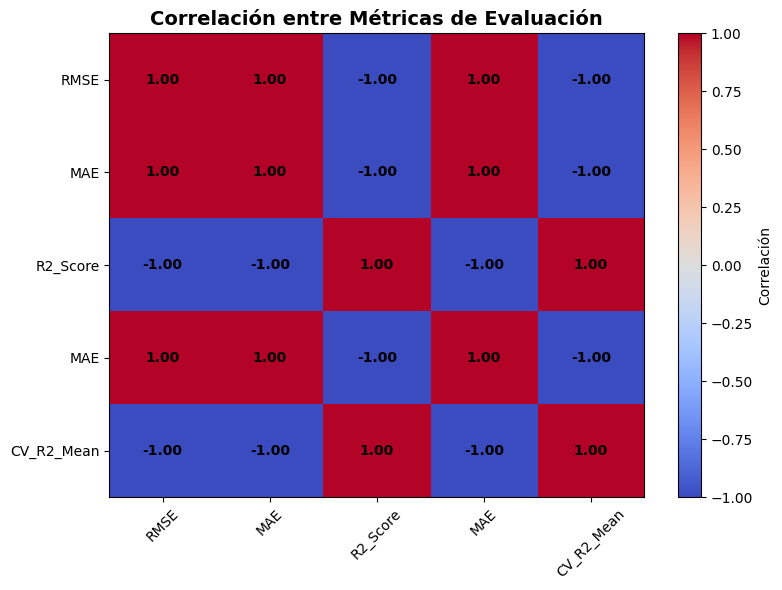

In [44]:
plt.figure(figsize=(8, 6))
correlation_matrix = regression[metricas_principales].corr()
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(label='Correlación')
plt.xticks(range(len(metricas_principales)), metricas_principales, rotation=45)
plt.yticks(range(len(metricas_principales)), metricas_principales)
plt.title("Correlación entre Métricas de Evaluación", fontsize=14, fontweight='bold')

for i in range(len(metricas_principales)):
    for j in range(len(metricas_principales)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

##Identificacion de mejores modelos

###Buscar mejor modelo por R², RMSE y CV R²

In [45]:
#R²
if "R2_Score" in regression.columns:
    best_r2_idx = regression["R2_Score"].idxmax()
    best_r2_model = regression.loc[best_r2_idx, "Model"]
    best_r2_score = regression.loc[best_r2_idx, "R2_Score"]
    print(f"🔹 Mejor modelo por R² Score: {best_r2_model}")
    print(f"   R² Score: {best_r2_score:.4f}")

#RMSE
if "RMSE" in regression.columns:
    best_rmse_idx = regression["RMSE"].idxmin()
    best_rmse_model = regression.loc[best_rmse_idx, "Model"]
    best_rmse_score = regression.loc[best_rmse_idx, "RMSE"]
    print(f"\n🔹 Mejor modelo por RMSE: {best_rmse_model}")
    print(f"   RMSE: {best_rmse_score:.4f}")

#CV R²
if "CV_R2_Mean" in regression.columns:
    best_cv_idx = regression["CV_R2_Mean"].idxmax()
    best_cv_model = regression.loc[best_cv_idx, "Model"]
    best_cv_score = regression.loc[best_cv_idx, "CV_R2_Mean"]
    best_cv_std = regression.loc[best_cv_idx, "CV_R2_Std"]
    print(f"\n🔹 Mejor modelo por Validación Cruzada: {best_cv_model}")
    print(f"   CV R²: {best_cv_score:.4f} ± {best_cv_std:.4f}")

🔹 Mejor modelo por R² Score: gradient_boosting
   R² Score: 0.5708

🔹 Mejor modelo por RMSE: gradient_boosting
   RMSE: 2.8806

🔹 Mejor modelo por Validación Cruzada: gradient_boosting
   CV R²: 0.5563 ± 0.0265


##Analisis de estabilidad y robustez (CV vs Test)

In [46]:
print("🔄 COMPARACIÓN: VALIDACIÓN CRUZADA vs TEST")
if all(col in regression.columns for col in ['CV_R2_Mean', 'R2_Score']):
    stability_analysis = regression[['Model', 'CV_R2_Mean', 'R2_Score']].copy()
    stability_analysis['Diferencia'] = stability_analysis['R2_Score'] - stability_analysis['CV_R2_Mean']
    stability_analysis['Overfitting_Ratio'] = stability_analysis['Diferencia'] / stability_analysis['CV_R2_Mean']
    display(stability_analysis.round(4))

🔄 COMPARACIÓN: VALIDACIÓN CRUZADA vs TEST


,Model,CV_R2_Mean,R2_Score,Diferencia,Overfitting_Ratio
4,gradient_boosting,0.5563,0.5708,0.0145,0.0260
3,random_forest,0.5522,0.5688,0.0165,0.0299
1,ridge,0.2723,0.2652,-0.0071,-0.0262
0,linear_regression,0.2723,0.2652,-0.0071,-0.0262
2,lasso,0.2723,0.2652,-0.0072,-0.0263


##Evaluacion de rendimiento

In [47]:
r2_negativos = regression[regression["R2_Score"] < 0]
if len(r2_negativos) > 0:
    print(f"\n⚠️  ADVERTENCIA: {len(r2_negativos)} modelo(s) con R² negativo")
    print("   Esto indica que el modelo es peor que usar la media simple")
    display(r2_negativos[['Model', 'R2_Score']])

In [48]:
print("\n💡 RECOMENDACIONES FINALES:")
if "ENSEMBLE" in regression["Model"].values:
    ensemble_perf = regression[regression["Model"] == "ENSEMBLE"].iloc[0]
    print(f"🎯 El modelo ENSEMBLE tiene:")
    if "R2_Score" in ensemble_perf:
        print(f"   • R² Score: {ensemble_perf['R2_Score']:.4f}")
    if "RMSE" in ensemble_perf:
        print(f"   • RMSE: {ensemble_perf['RMSE']:.4f}")
    print("   ⭐ Recomendado para producción por su robustez")


💡 RECOMENDACIONES FINALES:


In [49]:
print("\n🏆 MEJOR MODELO DE REGRESIÓN Y JUSTIFICACIÓN")
print("=" * 50)

# Definir la métrica principal para regresión
metrica_principal_regresion = "R2_Score"

# Encontrar el mejor modelo basado en R² Score (la métrica más importante para regresión)
if metrica_principal_regresion in regression.columns:
    mejor_modelo_regresion = regression.loc[regression[metrica_principal_regresion].idxmax()]

    print(f"🎯 EL MEJOR MODELO DE REGRESIÓN ES: {mejor_modelo_regresion['Model']}")
    print(f"📊 JUSTIFICACIÓN: Se seleccionó basado en el mayor R² Score ({mejor_modelo_regresion[metrica_principal_regresion]:.4f})")
    print("\n📈 MÉTRICAS DESTACADAS DEL MEJOR MODELO:")
    print(f"   • R² Score: {mejor_modelo_regresion['R2_Score']:.4f}")
    print(f"   • RMSE: {mejor_modelo_regresion['RMSE']:.4f}")
    print(f"   • MAE: {mejor_modelo_regresion['MAE']:.4f}")
    if 'CV_R2_Mean' in mejor_modelo_regresion:
        print(f"   • CV R²: {mejor_modelo_regresion['CV_R2_Mean']:.4f} ± {mejor_modelo_regresion['CV_R2_Std']:.4f}")
else:
    print("⚠️ No se pudo determinar el mejor modelo - métrica R² Score no disponible")


🏆 MEJOR MODELO DE REGRESIÓN Y JUSTIFICACIÓN
🎯 EL MEJOR MODELO DE REGRESIÓN ES: gradient_boosting
📊 JUSTIFICACIÓN: Se seleccionó basado en el mayor R² Score (0.5708)

📈 MÉTRICAS DESTACADAS DEL MEJOR MODELO:
   • R² Score: 0.5708
   • RMSE: 2.8806
   • MAE: 1.6638
   • CV R²: 0.5563 ± 0.0265


##Conclusion

El modelo Gradient Boosting Regressor se posiciona como el mejor modelo de regresión, alcanzando un R² Score de 0.5708, lo que indica que explica aproximadamente el 57% de la variabilidad observada en los datos. Este desempeño refleja una capacidad predictiva sólida y equilibrada, especialmente considerando la naturaleza compleja y multivariable del problema.

Las métricas de error —RMSE: 2.8806 y MAE: 1.6638— evidencian que el modelo logra mantener errores de predicción moderados y consistentes, lo que refuerza su utilidad práctica. Además, la validación cruzada (CV R²: 0.5563 ± 0.0265) muestra una buena estabilidad entre particiones, confirmando que el modelo generaliza adecuadamente sin signos significativos de sobreajuste.

En conclusión, el modelo Gradient Boosting ofrece un rendimiento confiable y generalizable, adecuado para escenarios de predicción continua.